In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [24]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [37]:
path = r'C:\Users\Bella\Desktop\Data Analytics\Achievment 6'

In [52]:
df = pd.read_csv(os.path.join(path, 'Covid_data.csv'))

In [53]:
df.shape

(509, 3)

In [54]:
df.head()

,Cases,Deaths,Total Population
0,6,0,7278717.0
1,14,0,39512223.0
2,10,0,12671821.0
3,11,0,7614893.0
4,29,0,7278717.0


## The Elbow technique

In [56]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [57]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-3.822966730520761e+16,
 -1.4807066841239884e+16,
 -9956037310451260.0,
 -7047610675268980.0,
 -5299268317651283.0,
 -4203514023938658.0,
 -3399607341030973.5,
 -2768707733244623.0,
 -2406760749077864.0]

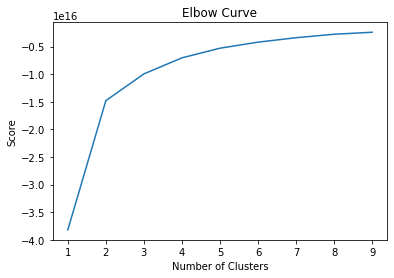

In [58]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [ ]:
# In this example, there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for the clusters is three.

### 3. k-means clustering

In [59]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1)

In [60]:
# Fit the k-means object to the data.

kmeans.fit(df)

C:\Users\Bella\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [61]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\Bella\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [62]:
df.head()

,Cases,Deaths,Total Population,clusters
0,6,0,7278717.0,0
1,14,0,39512223.0,2
2,10,0,12671821.0,0
3,11,0,7614893.0,0
4,29,0,7278717.0,0


In [63]:
df['clusters'].value_counts()

1    319
0    157
2     33
Name: clusters, dtype: int64

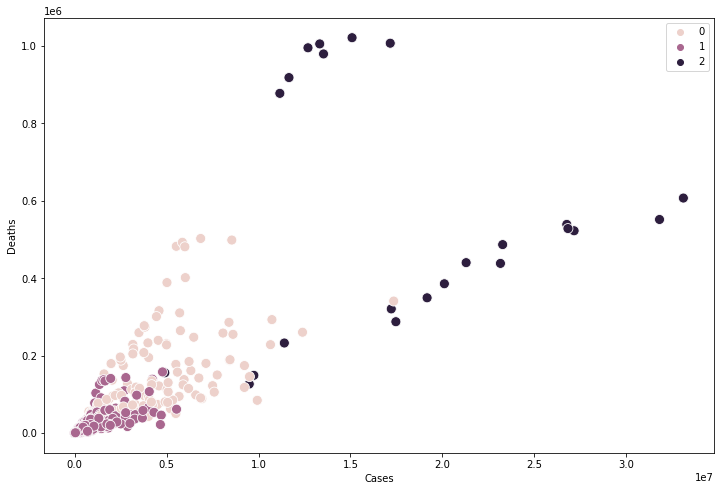

In [64]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Cases'], y=df['Deaths'], hue=kmeans.labels_, s=100) 
# Here, we're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points we want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Cases') # Label x-axis.
plt.ylabel('Deaths') # Label y-axis.
plt.show()

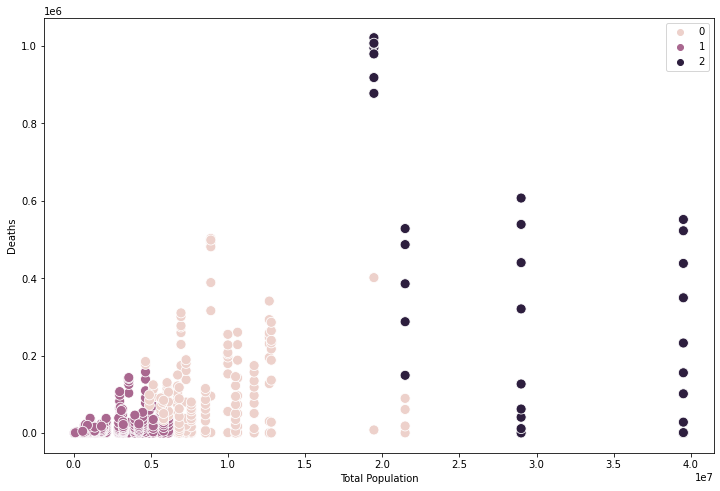

In [71]:
# Plot the clusters for the "Total Population" and "Deaths" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Total Population'], y=df['Deaths'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Total Population') 
plt.ylabel('Deaths') 
plt.show()

In [68]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [69]:
df.groupby('cluster').agg({'Cases':['mean', 'median'], 
                         'Deaths':['mean', 'median'], 
                         'Total Population':['mean', 'median']})

Cases                   Deaths         Total Population  \
                     mean    median           mean  median             mean   
cluster                                                                       
dark purple  1.290942e+07  12690287  399181.878788  349458     2.933809e+07   
pink         3.498205e+06   3148094  116067.917197   86483     9.099586e+06   
purple       7.087302e+05    273194   17179.774295    5485     2.429059e+06   

                         
                 median  
cluster                  
dark purple  28995881.0  
pink          8535519.0  
purple        1934408.0

In [ ]:
#  the scatterplot above represent intense increase of coronavirus cases.